In [1]:
from data.data_manager_depth import ISRLHumanDepthDatasetManager
from data.data_manager_test import ISRLHumanTestDatasetManager
from data.data_config import ISRLHumanConfig
from utils.utils import find_ground_truth_number, find_TPs_FPs, sort_TPs_FPs, compute_precision_recall_CORRECTLY, plot_precision_recall_CORRECTLY
from mrcnn.model import MaskRCNN
from predict_config import PredictionConfig
from evaluate import evaluate_model, evaluate_model_yolo
from plot_predict import plot_maskrcnn, plot_dataset
import numpy as np

from evaluate import get_precision_recall_for_mrcnn, plot_precision_recall_my, get_precision_recall_for_yolo

/home/stepan/repositories/intro2cv_final_project/venv2/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/stepan/repositories/intro2cv_final_project/venv2/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/stepan/repositories/intro2cv_final_project/venv2/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = n

# Import Datasets

In [2]:
# train set
train_set = ISRLHumanDepthDatasetManager()
train_set.load_dataset('../../../../datasets/intro2CV_dataset', dataset_type="train")
train_set.prepare()
print('Train: %d' % len(train_set.image_ids))

# validation set
val_set = ISRLHumanDepthDatasetManager()
val_set.load_dataset('../../../../datasets/intro2CV_dataset', dataset_type="val")
val_set.prepare()
print('Val: %d' % len(val_set.image_ids))

# test set
test_set = ISRLHumanDepthDatasetManager()
test_set.load_dataset('../../../../datasets/intro2CV_dataset', dataset_type="test")
test_set.prepare()
print('Test: %d' % len(test_set.image_ids))

# TEST 2 DATASET
test_set_2 = ISRLHumanTestDatasetManager()
test_set_2.load_dataset('../../../../datasets/intro2CV_dataset2', start=-1, size=10000)
test_set_2.prepare()
print('Test2: %d' % len(test_set_2.image_ids))

Indices: [ 39 166  93  62 195 119  38 184 160  89   4 124 191  95  98 106  31 105
  67 214 110  34 162 168  44 163 188 218  18 152 220 181 107  19  84  91
  33  51  35  11  29   0 202  99 138  85  28  16 114 122  73  58 120  47
  78 179  27 222  40 130  69 224 155 207 171 158 102  88  59 215 151 197
 223  14 145  21  56 194  55 154  53 116 159  90 108  42  17   5 167 117
  48 182  66  70 199 208  54 169 170 212  97 118 164 189  94 187  12 150
 127 216 147 176 123  81 148 180  13 200  82 112 161 201  45 132 103  36
 183 209 185 219  75 206 196 174   2 172   6 190 177  77 113  65  46  74
  92 165  87 143 205  10  32 136  83 210 100 125  23 126]
Train: 158
Indices: [  9 193 104 153 173 135 111 211  64  15  41 186 109  80  52  26  76  43
  24   3 217  49 149 131 213  30 121 175 115 198   8  60 128   1  57  22
  61  63   7 221 141  86  96  68]
Val: 44
Indices: [ 50 142 157 156 139 146 101  20 178  25 134  71 204 129 144 192  79 133
 203 137  72 140  37]
Test: 23
0
1
2
3
4
5
6
7
8
9
10
11
12

(720, 1280, 3)
(720, 1280, 1)


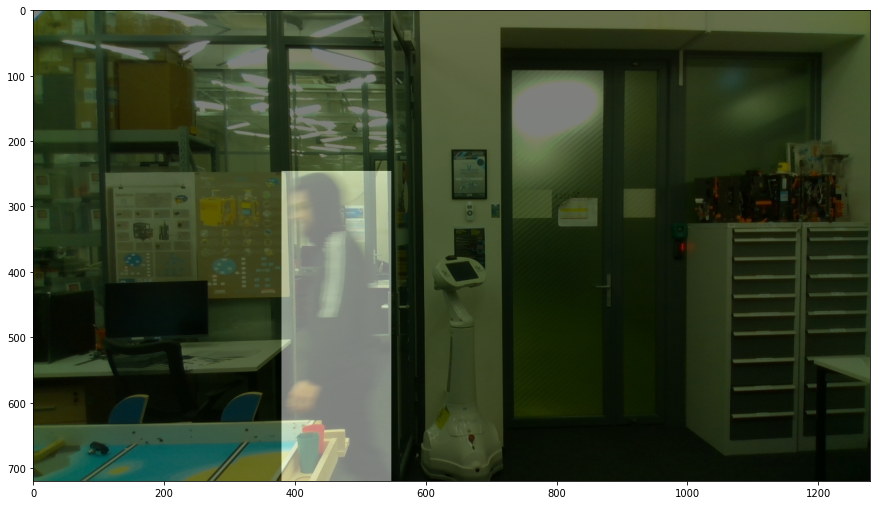

In [3]:
plot_dataset(test_set_2, 5)

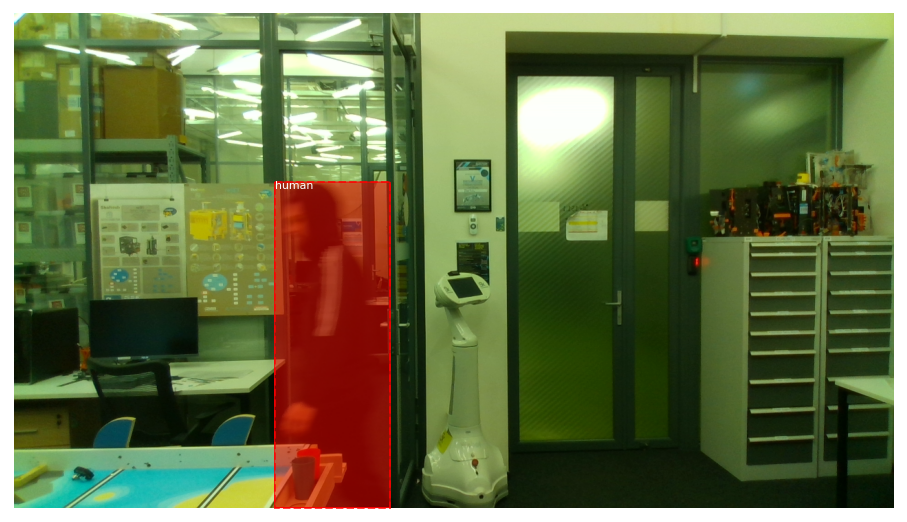

In [4]:
from mrcnn.visualize import display_instances
from mrcnn.utils import extract_bboxes

image_id = 5
image = test_set_2.load_image(image_id)
mask, class_ids = test_set_2.load_mask(image_id)
bbox = extract_bboxes(mask)
display_instances(image, bbox, mask, class_ids, train_set.class_names)

# Precision Recall for Mask RCNN

In [5]:
cfg = PredictionConfig()
model = MaskRCNN(mode='inference', model_dir='./', config=cfg)
model.load_weights('../../models/mask_rcnn_human_cfg_0005_3_train_test_val_human_mask.h5', by_name=True)








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.








In [6]:
investigated_set = test_set_2
ground_truth = find_ground_truth_number(investigated_set, cfg)
ground_truth

Image id: 0
Number of gt_bboxes: [[418 454 800 602]]
Image id: 1
Number of gt_bboxes: [[416 410 800 514]]
Image id: 2
Number of gt_bboxes: [[410 377 800 479]]
Image id: 3
Number of gt_bboxes: [[416 353 800 466]]
Image id: 4
Number of gt_bboxes: [[416 325 800 446]]
Image id: 5
Number of gt_bboxes: [[421 304 800 438]]
Image id: 6
Number of gt_bboxes: [[420 268 725 379]]
Image id: 7
Number of gt_bboxes: [[420 233 724 349]]
Image id: 8
Number of gt_bboxes: [[416 198 724 326]]
Image id: 9
Number of gt_bboxes: [[420 162 724 294]]
Image id: 10
Number of gt_bboxes: [[422 126 726 246]]
Image id: 11
Number of gt_bboxes: [[425 106 729 220]]
Image id: 12
Number of gt_bboxes: [[414  64 729 190]]
Image id: 13
Number of gt_bboxes: [[411  48 729 186]]
Image id: 14
Number of gt_bboxes: [[407   2 729 150]]
Image id: 15
Number of gt_bboxes: [[407   2 729 135]]
Image id: 16
Number of gt_bboxes: [[411   0 730 121]]
Image id: 17
Number of gt_bboxes: [[414   2 729 102]]
Image id: 18
Number of gt_bboxes: [[42

661

In [7]:
tps_fps = find_TPs_FPs(investigated_set, model, cfg)
len(tps_fps)

Number of real_bboxes: [[406 461 792 588]]
[0.81808474]
Confidenses: [0.98137295]
Number of real_bboxes: []
[]
Confidenses: []
Number of real_bboxes: [[416 385 596 463]]
[0.35294118]
Confidenses: [0.9796585]
Number of real_bboxes: [[418 361 590 442]]
[0.32107301]
Confidenses: [0.9876122]
Number of real_bboxes: [[421 331 594 388]]
[0.21222882]
Confidenses: [0.78763145]
Number of real_bboxes: [[423 315 591 380]]
[0.21501989]
Confidenses: [0.97955006]
Number of real_bboxes: [[422 258 603 360]]
[0.46690032]
Confidenses: [0.9227072]
Number of real_bboxes: [[414 221 582 314]]
[0.34745538]
Confidenses: [0.90946376]
Number of real_bboxes: [[403 194 649 307]]
[0.60722056]
Confidenses: [0.9874362]
Number of real_bboxes: [[399 146 637 290]]
[0.59574468]
Confidenses: [0.8922782]
Number of real_bboxes: []
[]
Confidenses: []
Number of real_bboxes: []
[]
Confidenses: []
Number of real_bboxes: [[418  61 641 167]]
[0.56911717]
Confidenses: [0.9256099]
Number of real_bboxes: [[420  40 666 182]]
[0.71892

618

In [8]:
tps_fps_sorted = sort_TPs_FPs(tps_fps)

In [9]:
precision_recall = compute_precision_recall_CORRECTLY(tps_fps_sorted, ground_truth)

1.0 0.0
2.0 0.0
3.0 0.0
4.0 0.0
5.0 0.0
6.0 0.0
7.0 0.0
8.0 0.0
9.0 0.0
10.0 0.0
11.0 0.0
12.0 0.0
13.0 0.0
14.0 0.0
15.0 0.0
16.0 0.0
17.0 0.0
18.0 0.0
19.0 0.0
20.0 0.0
21.0 0.0
22.0 0.0
23.0 0.0
24.0 0.0
25.0 0.0
26.0 0.0
27.0 0.0
28.0 0.0
29.0 0.0
30.0 0.0
31.0 0.0
32.0 0.0
33.0 0.0
34.0 0.0
35.0 0.0
36.0 0.0
37.0 0.0
38.0 0.0
39.0 0.0
40.0 0.0
41.0 0.0
42.0 0.0
43.0 0.0
44.0 0.0
45.0 0.0
46.0 0.0
47.0 0.0
48.0 0.0
49.0 0.0
50.0 0.0
51.0 0.0
52.0 0.0
53.0 0.0
54.0 0.0
55.0 0.0
56.0 0.0
57.0 0.0
58.0 0.0
59.0 0.0
60.0 0.0
61.0 0.0
62.0 0.0
63.0 0.0
64.0 0.0
65.0 0.0
66.0 0.0
67.0 0.0
68.0 0.0
69.0 0.0
70.0 0.0
71.0 0.0
72.0 0.0
73.0 0.0
74.0 0.0
75.0 0.0
76.0 0.0
77.0 0.0
78.0 0.0
79.0 0.0
80.0 0.0
81.0 0.0
82.0 0.0
83.0 0.0
84.0 0.0
85.0 0.0
86.0 0.0
87.0 0.0
88.0 0.0
89.0 0.0
90.0 0.0
91.0 0.0
92.0 0.0
93.0 0.0
94.0 0.0
95.0 0.0
96.0 0.0
97.0 0.0
98.0 0.0
99.0 0.0
100.0 0.0
101.0 0.0
102.0 0.0
103.0 0.0
104.0 0.0
105.0 0.0
106.0 0.0
107.0 0.0
108.0 0.0
109.0 0.0
110.0 0.0
111.0 0.

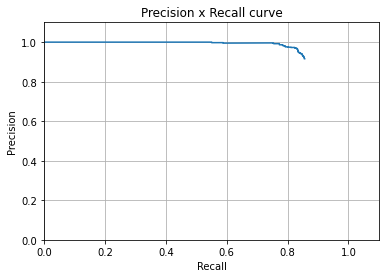

In [10]:
plot_precision_recall_CORRECTLY(precision_recall)

In [ ]:
precision_recall